In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv('experiment_results.csv')
results.head()

,dataset,modification,percentage,method,metric,value
0,Dancer 01,random asc,0.0,Louvain-igraph,P,9.000000
1,Dancer 01,random asc,0.0,Louvain-igraph,P*/P,0.666667
2,Dancer 01,random asc,0.0,Louvain-igraph,Modularity,0.649290
3,Dancer 01,random asc,0.0,Louvain-igraph,NMI,0.775724
4,Dancer 01,random asc,0.0,Fastgreedy,P,8.000000


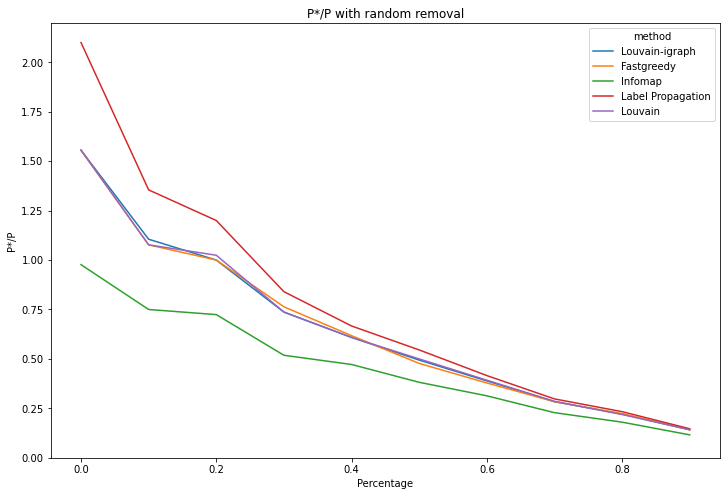

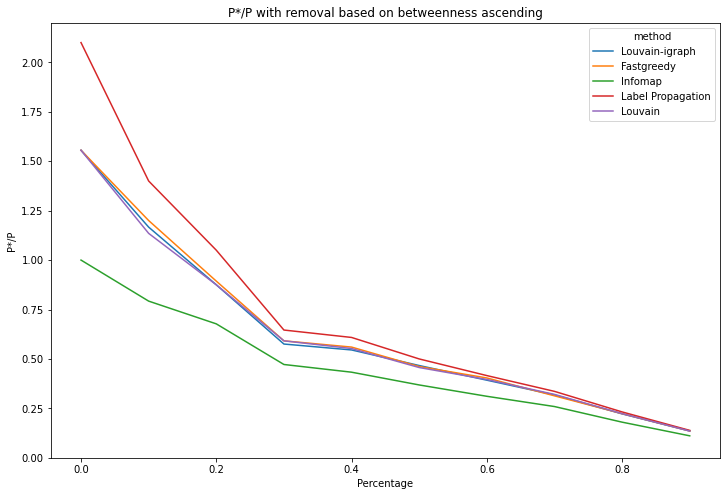

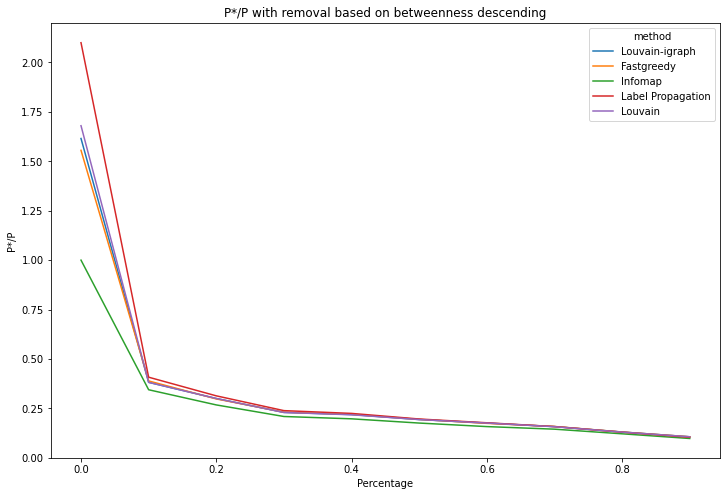

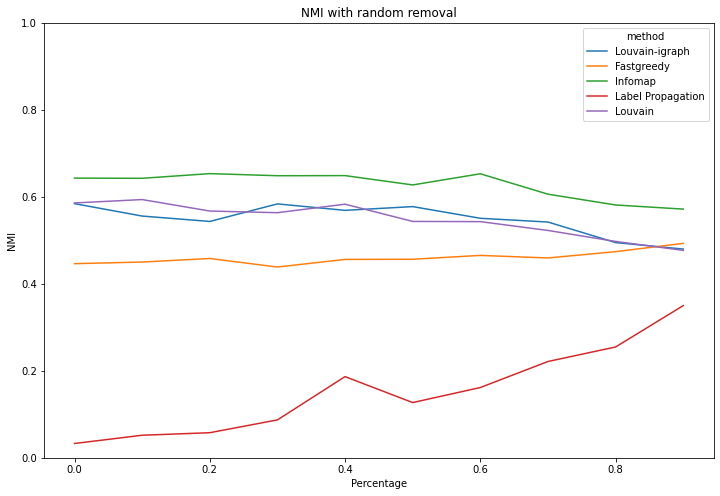

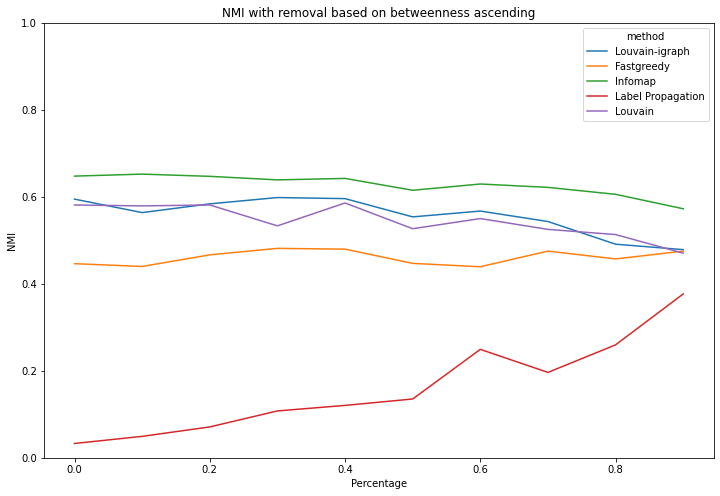

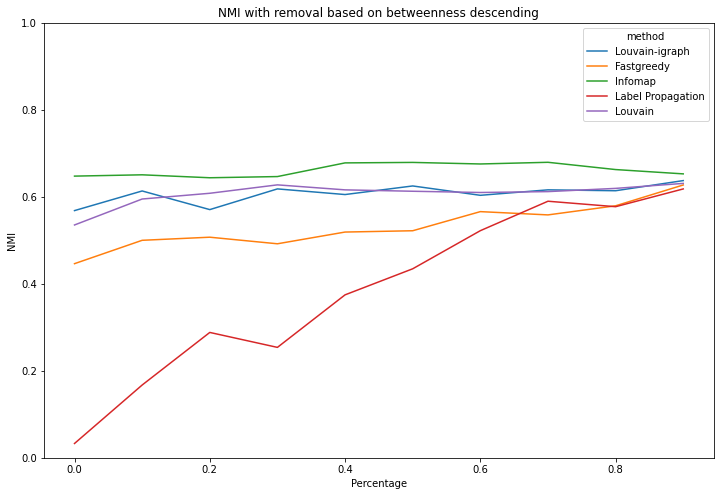

In [5]:
for metric in ['P*/P','NMI']:
#for metric in metrics['metric'].unique():
    for modification in results['modification'].unique():
#        for dataset in metrics['dataset'].unique():
        for dataset in ['Email EU']:
            fig, ax = plt.subplots(ncols=1, figsize=(12,8))
            data = results[(results['metric'] == metric) &
                           (results['modification'] == modification) &
                           (results['dataset'] == dataset)]
            sns.lineplot(data=data, x='percentage', y='value', hue='method',ax=ax)
            
            ax.set_ylabel(metric)
            ax.set_xlabel('Percentage')
            
            if metric == 'NMI':
                ax.set_ybound(upper=1, lower=0)
            else:
                ax.set_ybound(lower=0)
            
            if modification == 'random asc':
                ax.set_title(metric+' with random removal')
            elif modification == 'betweenness asc':
                ax.set_title(metric+' with removal based on betweenness ascending')
            elif modification == 'betweenness desc':
                ax.set_title(metric+' with removal based on betweenness descending')

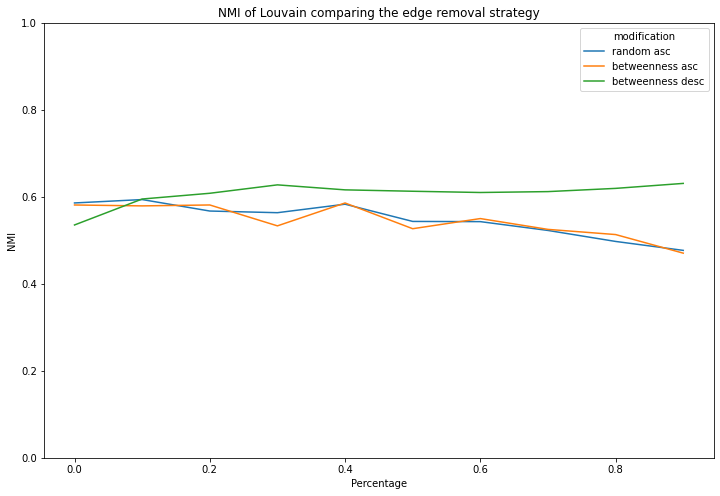

In [6]:
fig, ax = plt.subplots(ncols=1, figsize=(12,8))
data = results[(results['metric'] == 'NMI') &
               (results['method'] == 'Louvain') &
               (results['dataset'] == 'Email EU')]
sns.lineplot(data=data, x='percentage', y='value', hue='modification',ax=ax)

ax.set_ylabel(metric)
ax.set_xlabel('Percentage')
ax.set_ybound(upper=1, lower=0)
ax.set_title('NMI of Louvain comparing the edge removal strategy')

plt.show()

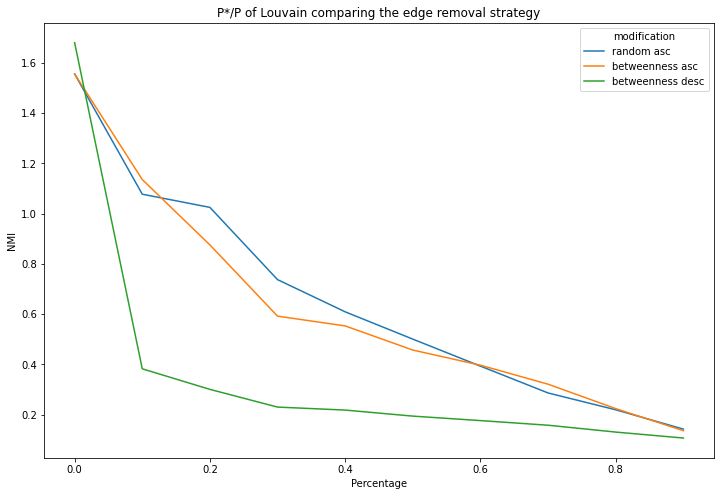

In [8]:
fig, ax = plt.subplots(ncols=1, figsize=(12,8))
data = results[(results['metric'] == 'P*/P') &
               (results['method'] == 'Louvain') &
               (results['dataset'] == 'Email EU')]
sns.lineplot(data=data, x='percentage', y='value', hue='modification',ax=ax)

ax.set_ylabel(metric)
ax.set_xlabel('Percentage')
#ax.set_ybound(upper=1, lower=0)
ax.set_title('P*/P of Louvain comparing the edge removal strategy')

plt.show()